In [ ]:
!pip install scikit-learn pandas matplotlib seaborn tensorflow

# 감기 진료건수와 기후 데이터간의 관계 분석
1. 데이터 전처리
2. 데이터 시각화 분석
3. 특성 데이터 전처리
4. 회귀 분석

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 1. 데이터 기초 전처리

### 1.1 기상청_서울 데이터세트에서 전처리
1. 결측치 처리
2. 필요없는 컬럼 제거
3. 일자의 데이터타입 변환

In [4]:
df1 = pd.read_csv('data/기상청_서울.csv', encoding='cp949')
df1.head(5)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%)
0,108,서울,2014-01-01,4.0,0.3,7.9,0.0,3.7,51.3
1,108,서울,2014-01-02,1.5,-1.3,6.2,NaN,2.0,35.4
2,108,서울,2014-01-03,2.3,-1.1,7.3,NaN,2.5,54.4
3,108,서울,2014-01-04,-0.1,-3.7,5.6,NaN,2.4,47.1
4,108,서울,2014-01-05,-0.8,-4.3,3.8,NaN,1.9,48.4


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          3652 non-null   int64  
 1   지점명         3652 non-null   object 
 2   일시          3652 non-null   object 
 3   평균기온(°C)    3652 non-null   float64
 4   최저기온(°C)    3651 non-null   float64
 5   최고기온(°C)    3651 non-null   float64
 6   일강수량(mm)    1423 non-null   float64
 7   평균 풍속(m/s)  3647 non-null   float64
 8   평균 상대습도(%)  3652 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 256.9+ KB


> - 최저기온, 최고기온, 일강수량, 평균 풍속에서 결측치 존재
> - 일강수량이 결측치가 많음
> - 기본적으로 float 타입의 수치형 데이터로 구성

#### 1.1.1. 결측치 처리
- 일강수량은 결측치를 0으로 대체
- 최저기온, 최고기온, 평균 풍속은 이전 관측치(일자)의 값으로 대체

In [6]:
df1['일강수량(mm)'] = df1['일강수량(mm)'].fillna(0)
df1.bfill(inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점          3652 non-null   int64  
 1   지점명         3652 non-null   object 
 2   일시          3652 non-null   object 
 3   평균기온(°C)    3652 non-null   float64
 4   최저기온(°C)    3652 non-null   float64
 5   최고기온(°C)    3652 non-null   float64
 6   일강수량(mm)    3652 non-null   float64
 7   평균 풍속(m/s)  3652 non-null   float64
 8   평균 상대습도(%)  3652 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 256.9+ KB


#### 1.1.2. 필요없는 컬럼 제거
- 지점, 지역명 컬럼은 고유 항목이 108, 서울 뿐이므로 제거

In [7]:
print(df1['지점'].unique())
print(df1['지점명'].unique())
df1.drop(['지점','지점명'], axis=1, inplace=True)
df1.info()

[108]
['서울']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          3652 non-null   object 
 1   평균기온(°C)    3652 non-null   float64
 2   최저기온(°C)    3652 non-null   float64
 3   최고기온(°C)    3652 non-null   float64
 4   일강수량(mm)    3652 non-null   float64
 5   평균 풍속(m/s)  3652 non-null   float64
 6   평균 상대습도(%)  3652 non-null   float64
dtypes: float64(6), object(1)
memory usage: 199.8+ KB


#### 1.1.3. 데이터 타입 변환
- 일자 컬럼의 데이터타입을 Datetime64로 변환하여 날짜형으로 활용
  

In [8]:
df1['일시'] = df1['일시'].astype('datetime64[ns]')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   일시          3652 non-null   datetime64[ns]
 1   평균기온(°C)    3652 non-null   float64       
 2   최저기온(°C)    3652 non-null   float64       
 3   최고기온(°C)    3652 non-null   float64       
 4   일강수량(mm)    3652 non-null   float64       
 5   평균 풍속(m/s)  3652 non-null   float64       
 6   평균 상대습도(%)  3652 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 199.8 KB


### 1.2 감기 진료정보 데이터 전처리
1. 시도지역이 서울인 관측치를 인덱싱
2. 필요없는 컬럼을 제거
3. 병합을 위한 컬럼이름 및 데이터타입 변경
4. 기상청 데이터와 병합

In [9]:
df2 = pd.read_csv('data/진료정보_감기_시도.csv', encoding='cp949')
df2

,날짜,시도지역코드,발생건수(건)
0,2014-01-01,11,5992
1,2014-01-01,26,3158
2,2014-01-01,27,2190
3,2014-01-01,28,3426
4,2014-01-01,29,2635
...,...,...,...
57914,2023-04-30,46,3838
57915,2023-04-30,47,3062
57916,2023-04-30,48,4288
57917,2023-04-30,49,1905


#### 1.2.1. 관측치 인덱싱 & 컬럼 제거
- 시도지역코드 값이 11인 관측치를 인덱싱 하여 서울 지역 데이터만 추출
- 인덱싱 후 시도지역코드 컬럼을 제거

In [10]:
df2_seoul = df2[df2['시도지역코드'] == 11]
df2_seoul.drop('시도지역코드', axis = 1, inplace=True)
df2_seoul

C:\Users\trave\AppData\Local\Temp\ipykernel_42768\151196605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seoul.drop('시도지역코드', axis = 1, inplace=True)


,날짜,발생건수(건)
0,2014-01-01,5992
17,2014-01-02,101309
34,2014-01-03,84210
51,2014-01-04,74899
68,2014-01-05,7695
...,...,...
57834,2023-04-26,104387
57851,2023-04-27,110121
57868,2023-04-28,124276
57885,2023-04-29,91335


#### 1.2.2. 컬럼 이름을 변경하여 병합
- 기상청 데이터의 일자와 감지 진료 데이터의 날짜 컬럼을 병합하기 위해 이름과 데이터타입을 통일
- 일자 컬럼을 기준으로 inner 병합

In [11]:
df2_seoul.rename({'날짜':'일시'}, axis=1, inplace=True)
df2_seoul['일시'] = pd.to_datetime(df2_seoul['일시'], format='%Y-%m-%d')

df_merge = pd.merge(df2_seoul, df1, on='일시', how='inner')
df_merge

C:\Users\trave\AppData\Local\Temp\ipykernel_42768\2048533070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seoul.rename({'날짜':'일시'}, axis=1, inplace=True)
C:\Users\trave\AppData\Local\Temp\ipykernel_42768\2048533070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_seoul['일시'] = pd.to_datetime(df2_seoul['일시'], format='%Y-%m-%d')


,일시,발생건수(건),평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%)
0,2014-01-01,5992,4.0,0.3,7.9,0.0,3.7,51.3
1,2014-01-02,101309,1.5,-1.3,6.2,0.0,2.0,35.4
2,2014-01-03,84210,2.3,-1.1,7.3,0.0,2.5,54.4
3,2014-01-04,74899,-0.1,-3.7,5.6,0.0,2.4,47.1
4,2014-01-05,7695,-0.8,-4.3,3.8,0.0,1.9,48.4
...,...,...,...,...,...,...,...,...
3402,2023-04-26,104387,10.2,7.4,13.5,0.0,3.1,69.9
3403,2023-04-27,110121,12.9,5.1,20.0,0.0,1.9,61.6
3404,2023-04-28,124276,15.7,9.0,21.3,1.9,2.1,62.0
3405,2023-04-29,91335,13.2,9.9,15.8,25.1,2.9,88.1


## 2. 데이터 시각화 분석

In [12]:
# 한글 폰트 입력
plt.rc('font', family='Malgun Gothic')

### 2.1 변수 관계 시각화
1. 피어슨 상관관계를 히트맵 시각화 하여 높은 상관관계를 가진 변수를 제거
2. 감기 발생건수에 대한 기후 데이터의 산점도 그래프를 통해 변수간 관계 확인

#### 2.1.1. 피어슨 상관 관계
- 피어슨 상관 관계 계수를 통해 상관 관계가 너무 높은 변수를 제거

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


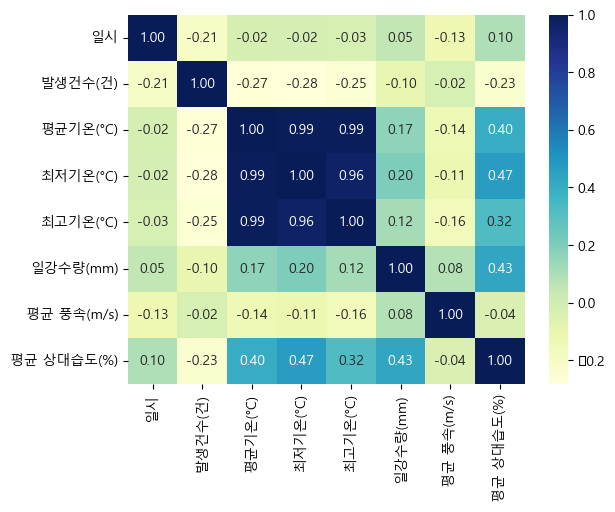

In [13]:
sns.heatmap(df_merge.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

> 평균기온, 최저기온, 최고기온의 상관관계 계수가 매우 높으므로, 3개의 변수중 평균기온 하나만 사용

In [14]:
df_merge.drop(['최저기온(°C)', '최고기온(°C)'], axis=1, inplace=True)
df_merge.columns

Index(['일시', '발생건수(건)', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)'], dtype='object')

#### 2.1.2. 발생건수와 기후 데이터간 산점도
- Y축은 발생건수 컬럼으로 고정
- X축은 각각 '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)' 으로 설정하여 4개의 산점도 시각화

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


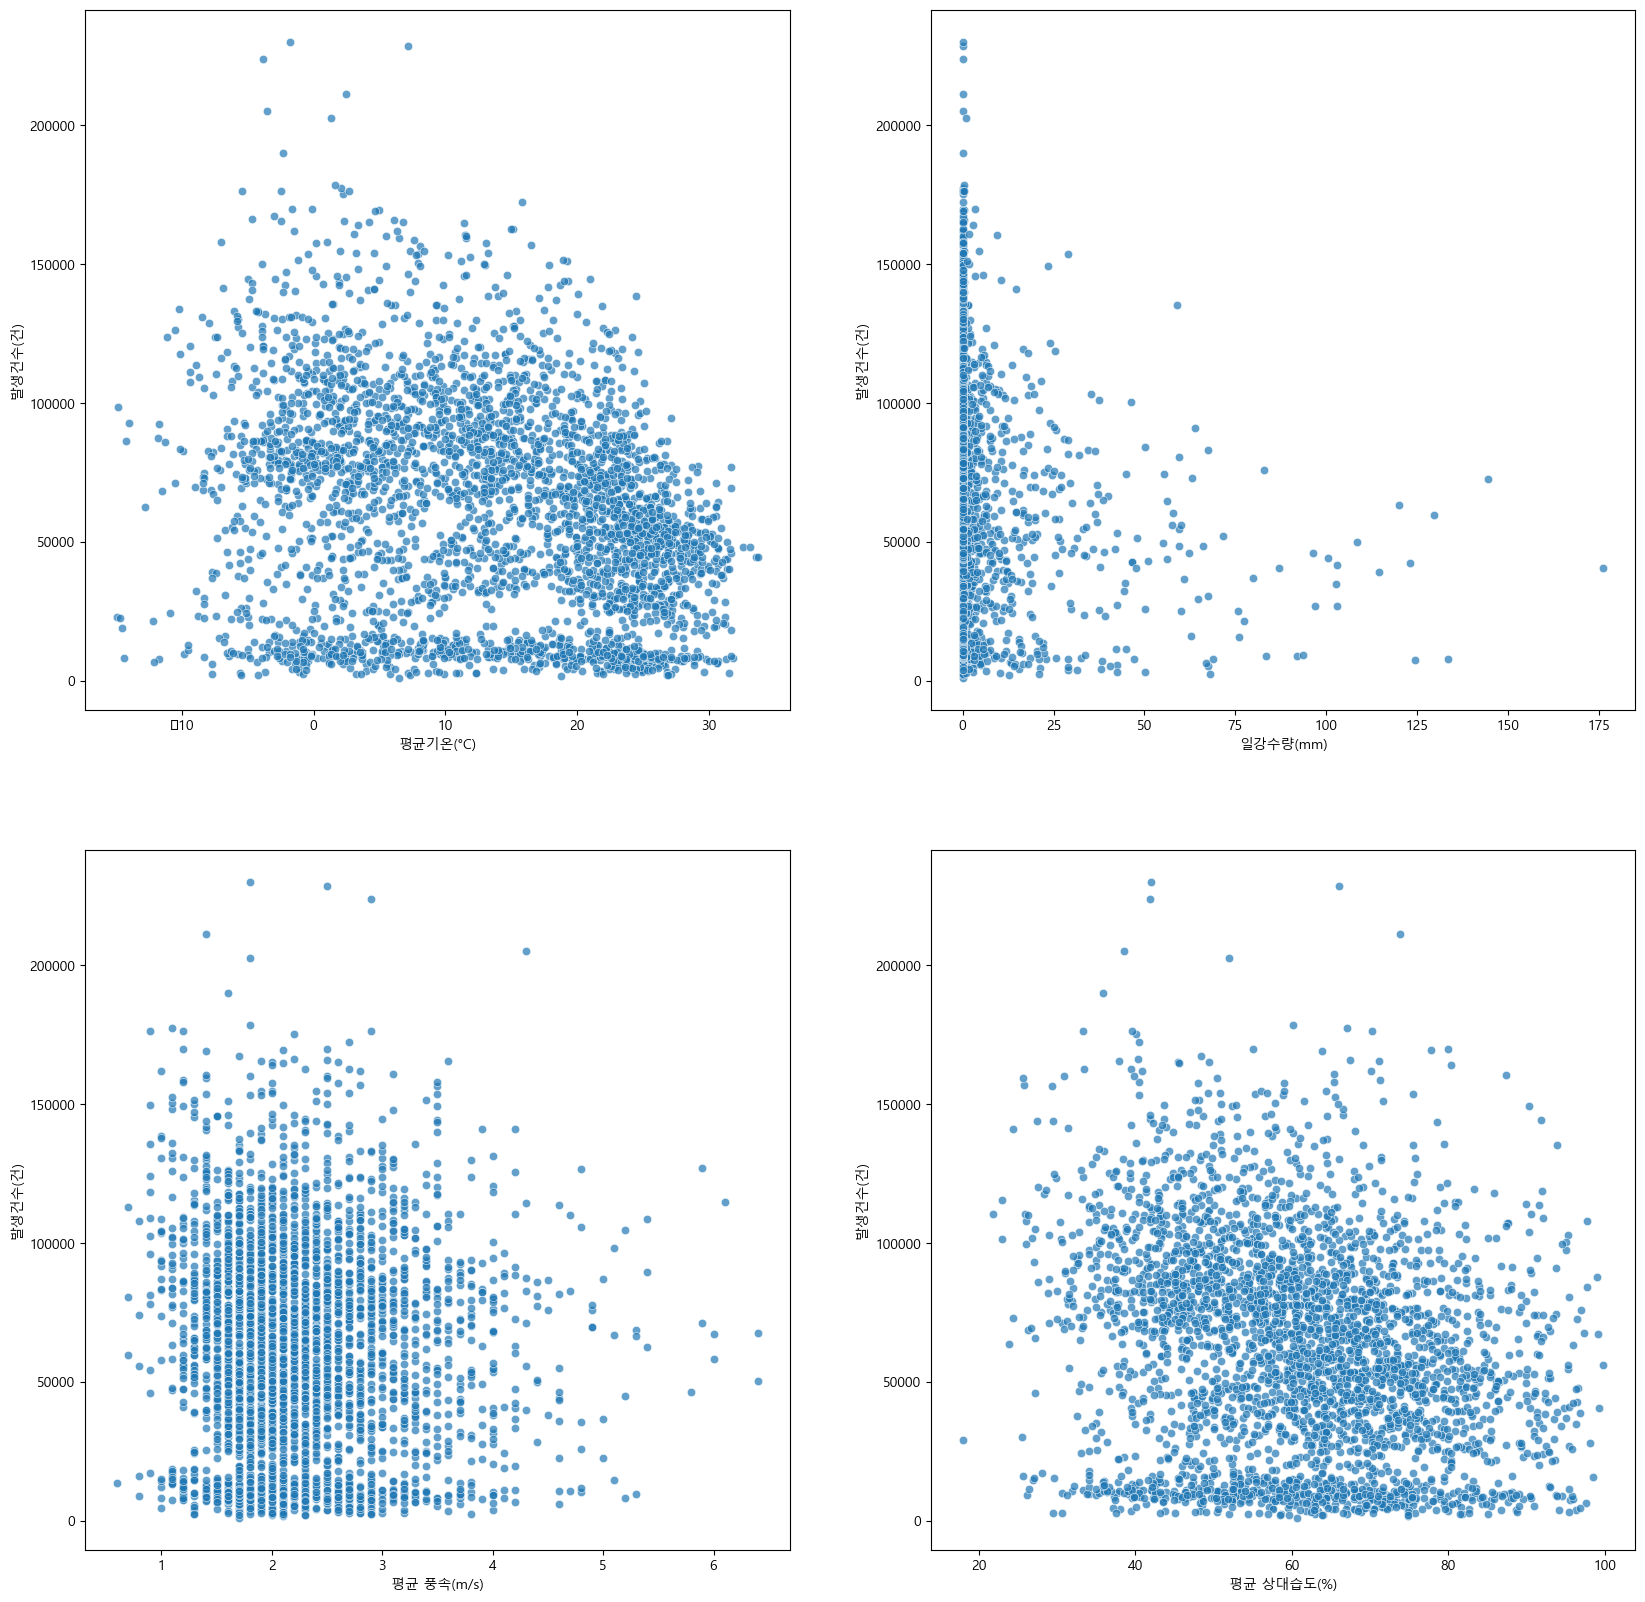

In [15]:
plt.figure(figsize = (20,20))

y_col = '발생건수(건)'
x_cols = ['평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)']

for i, col in enumerate(x_cols):
    ax = plt.subplot(2,2,i+1)
    sns.scatterplot(df_merge, x =col, y=y_col, ax = ax, alpha=0.7)

plt.show()


> - 감기 발생건수와 각 기후 데이터간의 선형적인 관계는 뚜렷하게 나타나지 않지만, 전반적으로 기후 데이터의 값이 높으면 감기 발생건수가 떨어지는 관계를 볼수 있다

### 2.2 일시별 추이 관계 시각화

#### 2.2.1. 년도별 평균 추이 시각화
- '년도' 컬럼을 생성하고 년도 별로 그룹화하여 년도별 각 기후 데이터에 대한 평균 산출
- 그룹화 결과에서 각 기후 평균의 max 값을 나누어 스케일링
- 스케일링된 년도별 평균값을 하나의 표에 선그래프로 시각화

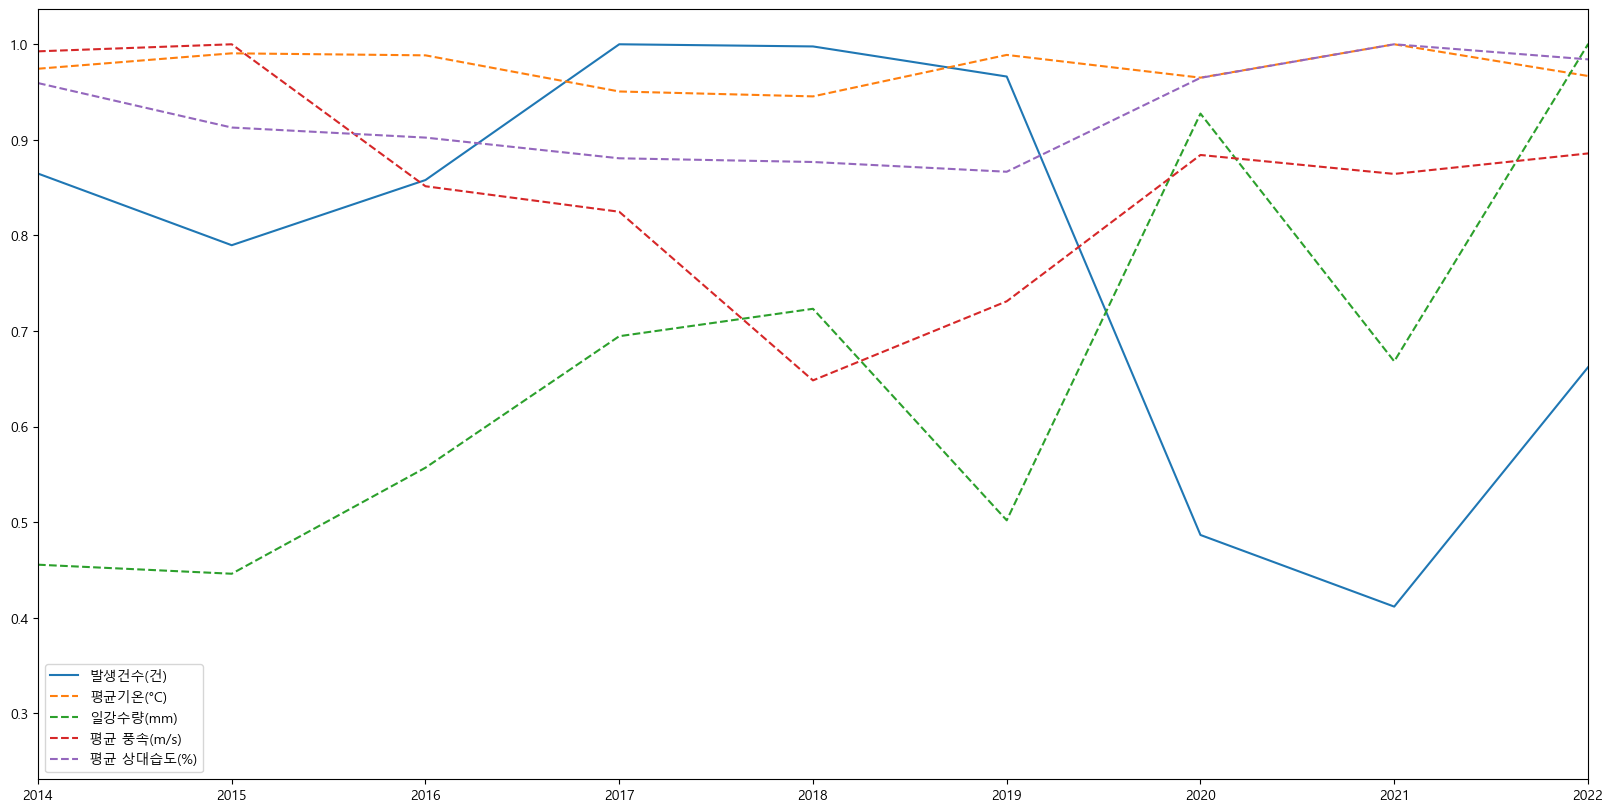

In [16]:
y_cols = ['발생건수(건)', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)']
x_col = '년도'
df_merge[x_col] = df_merge['일시'].dt.year
df_year = df_merge.groupby(x_col)[y_cols].mean()

df_year = df_year / df_year.max()

plt.figure(figsize = (20,10))
ax = plt.subplot()
ax.plot(df_year.index, df_year['발생건수(건)'], label='발생건수(건)') 
for col in y_cols[1:]:
    ax.plot(df_year.index, df_year[col], linestyle='--', label=col)
ax.set_xlim((2014,2022), auto=True) # 2023년도는 4월까지만 관측치가 존재하므로 제외
plt.legend()
plt.show()

> - '발생건수'는 2015년도에서 2017년도 까지 증가 추세를 보이다가 2020,2021년도에서 급격히 감소. 급감소한 2020,2021년도는 코로나 사태가 영향을 미쳤을것으로 예상
> - '평균기온', '평균습도'는 전반적으로 추이 변화가 크지 않음
> - '평균풍속'은 2018년도에 급감소 했다 2020년도에 다시 증가 추세
> - '일강수량'은 전반적으로 증가 추세

#### 2.2.2. 월별 평균 추이 시각화
- 월별 추이 특성을 보기위해 안정적인 변화폭을 가진 2016년도와 발생건수의 특수한 변화가 있던 2020년도의 월별 추이를 파악

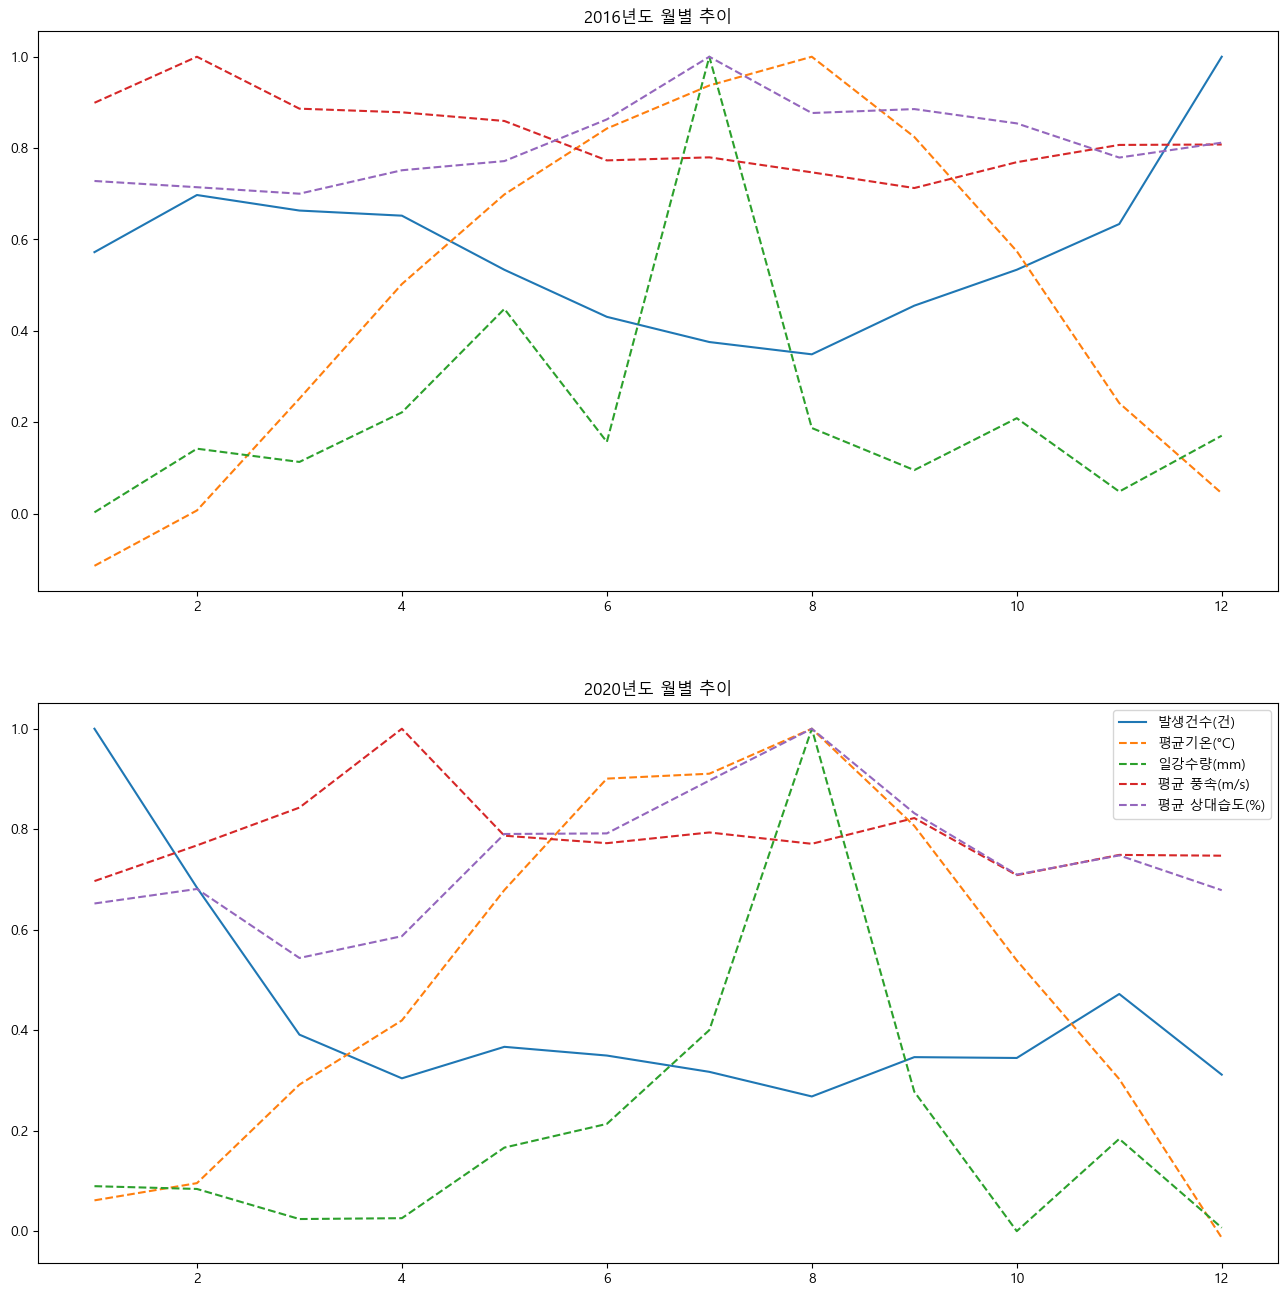

In [17]:
y_cols = ['발생건수(건)', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)']
x_col = '월'
df_merge[x_col] = df_merge['일시'].dt.month

df16 = df_merge[df_merge['년도'] == 2016]
df20 = df_merge[df_merge['년도'] == 2020]

df16 = df16.groupby(x_col)[y_cols].mean()
df16 = df16 / df16.max()

df20 = df20.groupby(x_col)[y_cols].mean()
df20 = df20 / df20.max()

plt.figure(figsize = (16,16))
ax1 = plt.subplot(2,1,1)
ax1.set_title('2016년도 월별 추이')
ax1.plot(df16.index, df16['발생건수(건)'], label='발생건수(건)') 
for col in y_cols[1:]:
    ax1.plot(df16.index, df16[col], linestyle='--', label=col)

ax2 = plt.subplot(2,1,2)
ax2.set_title('2020년도 월별 추이')
ax2.plot(df20.index, df20['발생건수(건)'], label='발생건수(건)') 
for col in y_cols[1:]:
    ax2.plot(df20.index, df20[col], linestyle='--', label=col)
    
plt.legend()
plt.show()

> - 2016년도와 2020년도의 상대적 추이 변화는 유사
> - '평균기온','일강수량','평균습도'의 월별 추이와 '발생건수'의 월별 추이에 관계성이 있음을 확인

#### 2.2.3. 일별 추이 시각화
- 가장 최근의 2022년도 관측치에서 각 변수에 대한 일별 추이 확인

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


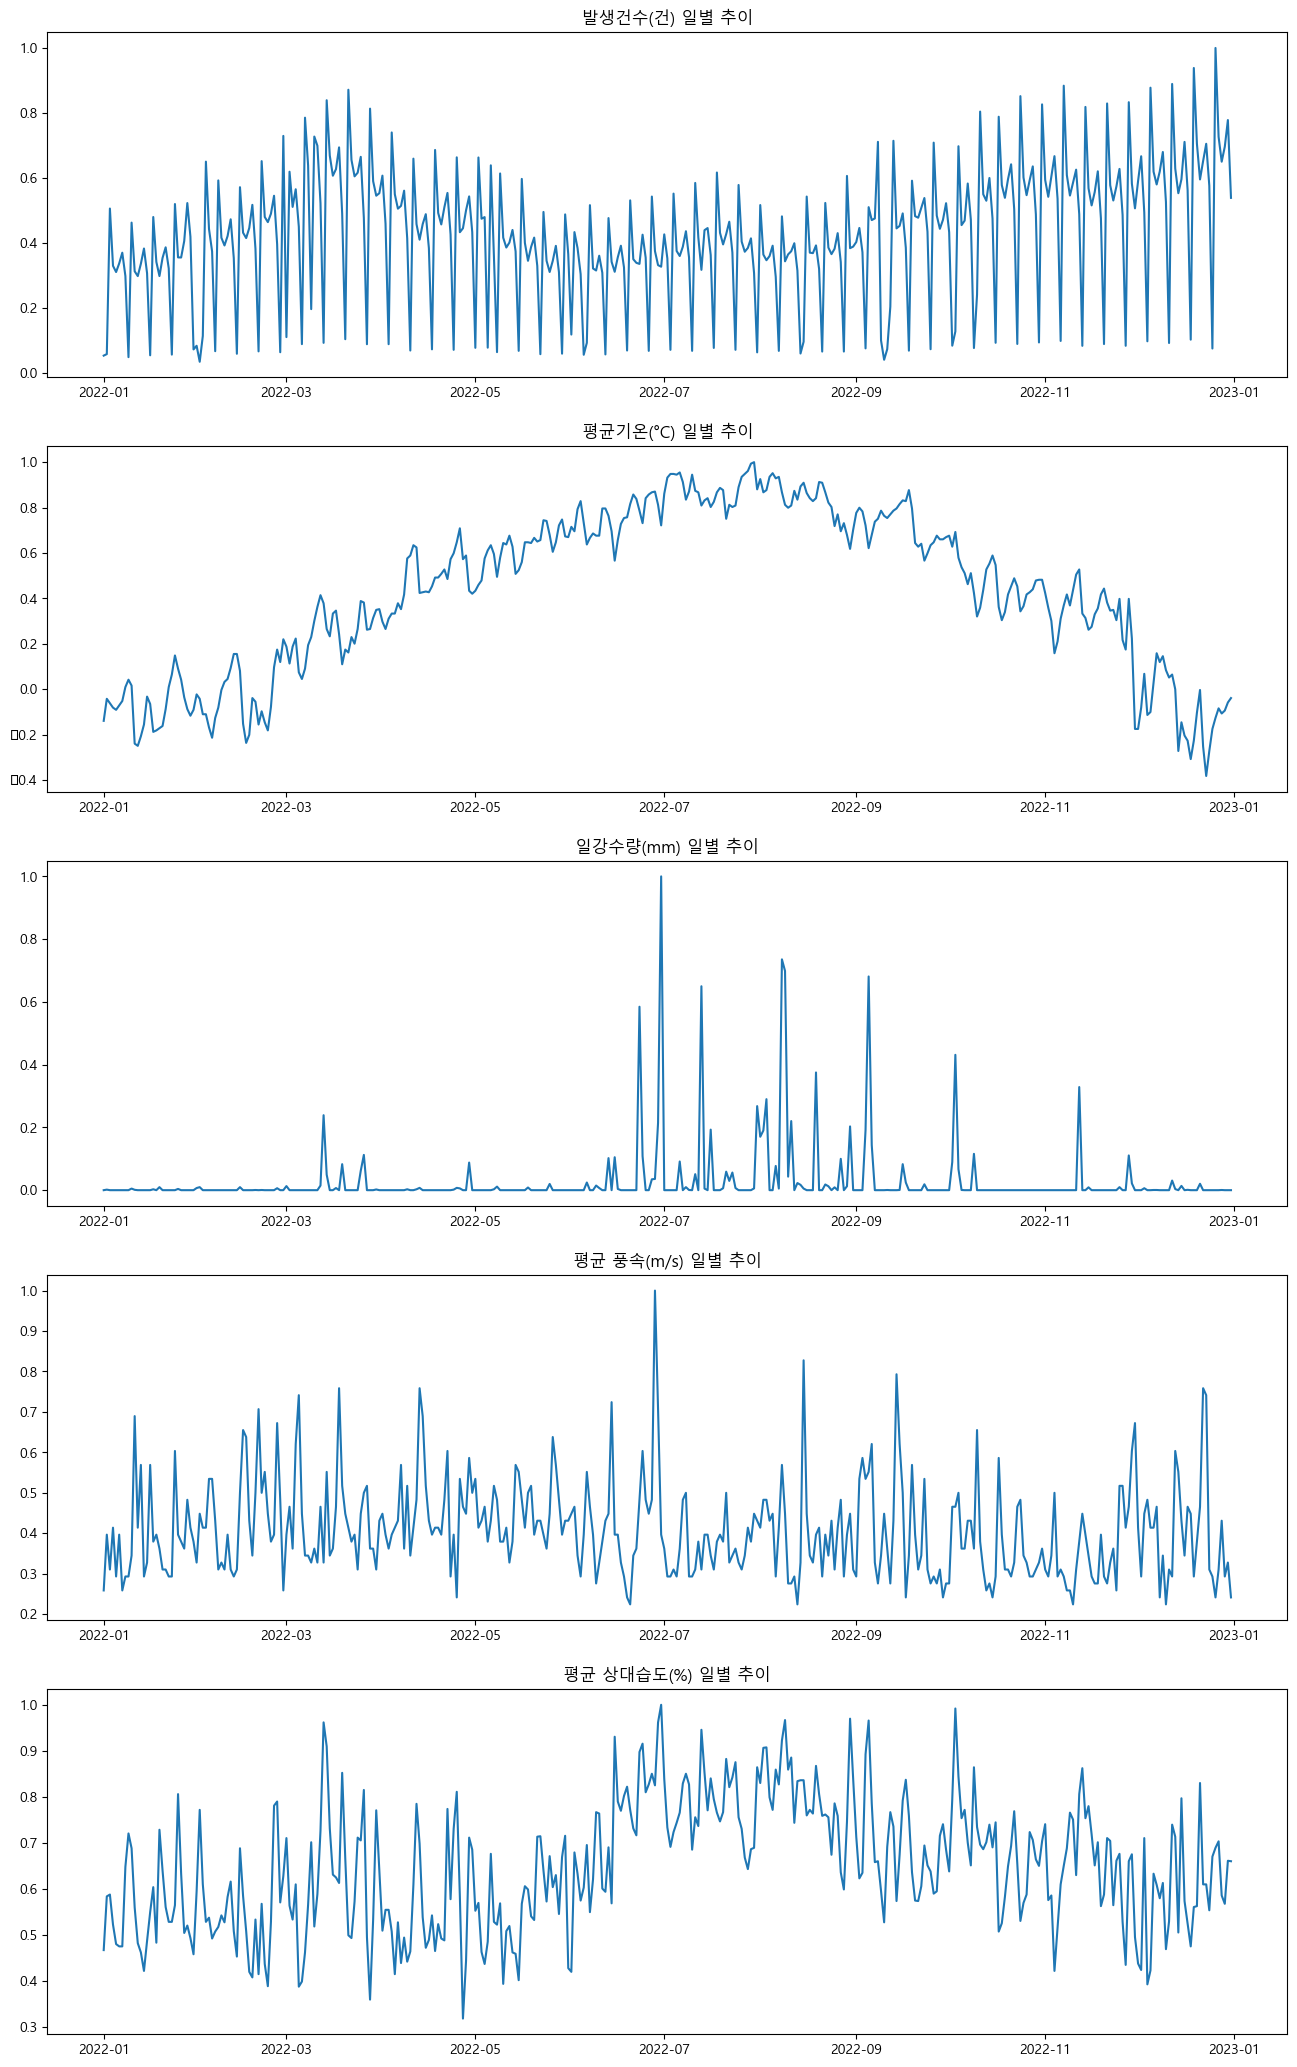

In [18]:
y_cols = ['발생건수(건)', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)']
x_col = '일시'
df22 = df_merge[df_merge['년도'] == 2022]

df22 = df22.groupby(x_col)[y_cols].mean()
df22 = df22 / df22.max()

plt.figure(figsize = (16,26))
for i,col in enumerate(y_cols):
    ax = plt.subplot(5,1,i+1)
    ax.plot(df22.index, df22[col])
    ax.set_title(f'{col} 일별 추이')
    
plt.show()

> - '발생건수'에서 일별 추이의 특정한 패턴이 발견됨
> - 기후데이터에서는 일별 추이에서 패턴은 크게 드러나지 않음

### 2.3 요일별 특성 확인
- '발생건수'에서 일별 추이의 패턴이 요일에 의한 패턴인지를 확인하기 위해 요일별 그룹화하여 막대그래프 시각화

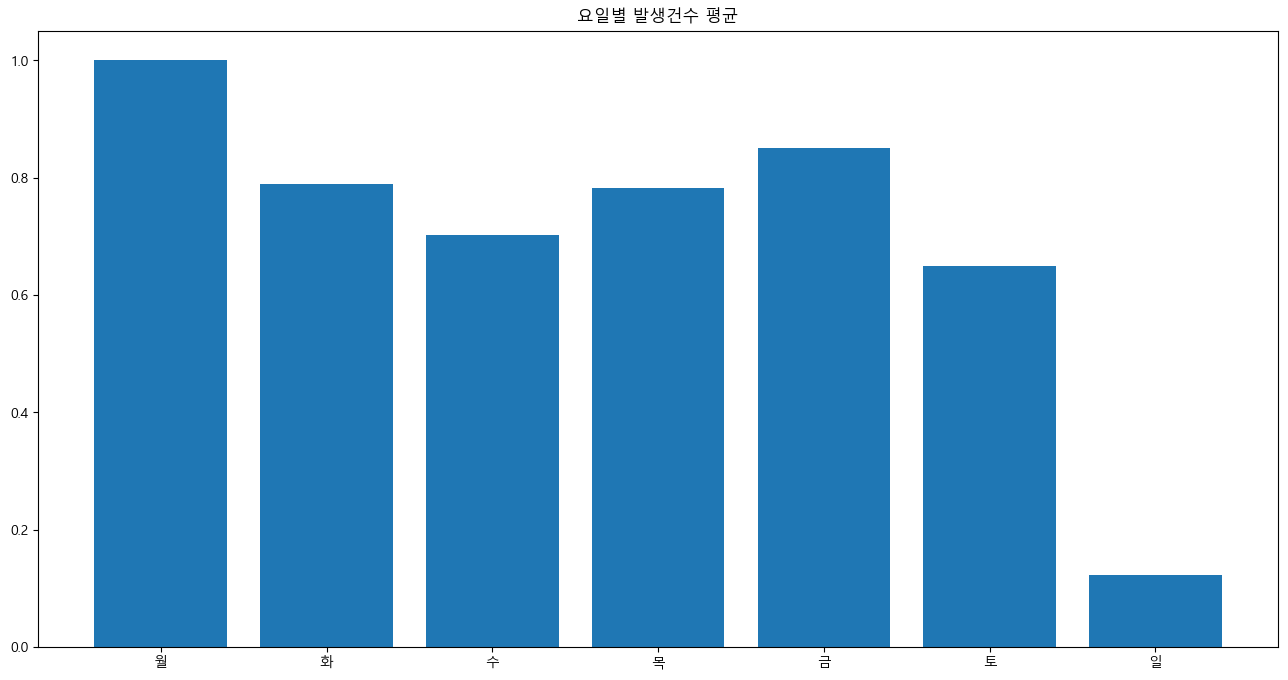

In [19]:
df_merge['요일'] = df_merge['일시'].dt.weekday
x_col = '요일'
y_col = '발생건수(건)'
df22 = df_merge[df_merge['년도'] == 2022]
df22 = df22.groupby(x_col)[y_col].mean()
df22 = df22 / df22.max()

plt.figure(figsize = (16,8))
ax = plt.subplot()
ax.bar(df22.index, df22)
ax.set_title(f'요일별 발생건수 평균')
ax.set_xticks(range(7), labels=['월','화','수','목','금','토','일'])
    
plt.show()

> - 주말중 일요일은 진료가 없으므로 다른 요일에 비해 진료건수가 낮음
> - 월,금요일이 진료가 많은편

## 3. 특성 데이터 전처리
- 기후 및 날짜 데이터를 특성 데이터로, 발생 건수 데이터를 타겟 데이터로 회귀 문제를 해결하기 위한 전처리
- 날짜 특성에서는 주기에 따른 관계성이 뚜렷한 월,요일 특성만을 활용
- 기후 특성 변수는 범위가 동일 하지 않으므로 standard 스케일링 진행
- 발생건수 타겟 데이터는 너무 큰 범위를 가지므로, 평균값으로 나누어 스케일링 진행
- 특성 변수를 윈도우 슬라이딩 방식을 사용하여 시계열 데이터로 전처리 

In [ ]:
xcol_1 = ['평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)']
xcol_2 = ['월','요일']
ycol = ['발생건수(건)']

### 3.1. 스케일링 전처리

#### 3.1.1. 특성 데이터의 통계표 확인

In [21]:
df_merge.describe()

,일시,발생건수(건),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),년도,월,요일
count,3407,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000
mean,2018-08-31 00:00:00,62706.742002,13.144643,3.161286,2.285383,60.710684,2018.176108,6.381567,3.001468
min,2014-01-01 00:00:00,1136.000000,-14.900000,0.000000,0.600000,17.900000,2014.000000,1.000000,0.000000
25%,2016-05-01 12:00:00,33374.000000,4.200000,0.000000,1.800000,49.500000,2016.000000,3.000000,1.000000
50%,2018-08-31 00:00:00,62699.000000,14.000000,0.000000,2.200000,60.600000,2018.000000,6.000000,3.000000
75%,2020-12-29 12:00:00,87498.500000,22.600000,0.300000,2.700000,70.900000,2020.000000,9.000000,5.000000
max,2023-04-30 00:00:00,230183.000000,33.700000,176.200000,6.400000,99.800000,2023.000000,12.000000,6.000000
std,NaN,37901.727834,10.566795,12.038728,0.760144,14.967669,2.698510,3.474509,1.999926


> - 특성 변수들이 각각 다른 수치 범위를 가지므로 스케일링이 필요
> - 타겟 변수의 수치 범위가 너무 크므로 스케일링 필요

#### 3.1.2. Standard 스케일링
- sklearn의 StandardScaler를 활용하여 기후 특성을 스케일링 후 날짜 특성과 연결

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_merge[xcol_1])
scale_X = scaler.transform(df_merge[xcol_1])

x2 = df_merge[xcol_2].to_numpy()
x = np.concatenate((scale_X,x2), axis=1)
# 평균이 0이 가까운지 확인
np.mean(x, axis=0)

array([-3.33686051e-17,  2.91975295e-17, -2.50264539e-17,  4.08765413e-16,
        6.38156736e+00,  3.00146757e+00])

### 3.2. 시계열(시퀀스) 데이터로 변환

#### 3.2.1. 윈도우 슬라이딩
- 윈도우 슬라이스 함수를 구축하여 특성 데이터를 시계열로 묶고 마지막 일자의 타겟 데이터를 시계열의 타겟으로 설정

In [34]:
def window_slice(seq_len, x, y):
    # 시계열 데이터를 슬라이딩 윈도우 방식으로 묶기
    series_X= []
    series_y= []
    for i in range(x.shape[0] - seq_len):
        window_X = x[i:i + seq_len]
        window_y = y[i + seq_len]
        series_X.append(window_X)
        series_y.append(window_y)

    series_X = np.array(series_X)
    series_y = np.array(series_y)
    print(series_X.shape, series_y.shape)

    return series_X, series_y


seq_len = 10
y = df_merge[ycol].to_numpy()
x, y = window_slice(seq_len, x, y)


(3397, 10, 6) (3397, 1)


> 총 10일을 시계열 데이터로 묵고 10번째 일자의 타겟을 시계열 타겟으로 설정

#### 3.2.2. 평가데이터 분리
- 뒤의 600일을 평가데이터로 분리하여 과거의 패턴으로 미래 예측이 가능한지를 평가 

In [35]:
train_X = x[:-600]
test_X = x[-600:]
train_Y = y[:-600]
test_Y = y[-600:]

print(train_X.shape, test_X.shape)
print(train_Y.shape, test_Y.shape)

(2797, 10, 6) (600, 10, 6)
(2797, 1) (600, 1)


## 4. 모델 회귀 분석
- 시계열 분석을 위해 tensorflow 프레임워크를 사용하여 LSTM keras 모델 구축
- keras 모델 학습을 위한 데이터세트 구축
- 모델 학습 및 평가

### 4.1. LSTM 모델링
- keras 함수형 모델링 방식으로 시계열 학습 모델 구성

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

lstm1 = layers.LSTM(16, return_sequences = True)
lstm2 = layers.LSTM(32, return_sequences = True)
lstm3 = layers.LSTM(32, return_sequences = True)
lstm4 = layers.LSTM(16, return_sequences = False)

dr = layers.Dropout(0.3)
dense1 = layers.Dense(1)

inp = tf.keras.Input(input_size)
x = lstm1(inp)
x = lstm2(x)
x = lstm3(x)
x = lstm4(x)
x = dr(x)
out = dense1(x)

model = tf.keras.Model(inp, out, name = 'lstm_model')

### 4.2 학습 및 평가 데이터세트 구축
- 전처리한 데이터를 tensorflow의 Dataset로 변환
- batch size 및 셔플 지정

In [ ]:
from tensorflow.data import Dataset

batch_size = 100

# Dataset으로 변환
train_ds = Dataset.from_tensor_slices((train_X, train_Y))
val_ds = Dataset.from_tensor_slices((test_X, test_Y))
# 셔플 및 배치 구성
train_ds = train_ds.shuffle(buffer_size=len(train_X)).batch(batch_size)
val_ds = val_ds.batch(batch_size)

# 데이터셋의 배치 크기 및 형상 확인
for x_batch, y_batch in train_ds.take(1):
    print("Train X batch shape:", x_batch.shape)
    print("Train Y batch shape:", y_batch.shape)

### 4.3. 학습 및 평가

#### 4.3.1. 모델 학습
- Adam optimizer 및 MeanSquaredError 손실 함수 설정
- 평가지표는 mape 및 r2_score로 설정
- 과적합 방지를 위한 체크포인트 설정
- 200 에포크로 학습 진행

In [ ]:
import os

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
# 컴파일
model = lstm_model((seq_len,input_size))
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001) # 아담 최적경사하강법
loss_fn = tf.keras.losses.MeanSquaredError()

model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['mape','r2_score'])

os.makedirs('checkpoint', exist_ok=True)
# 체크포인트 경로지정
checkpoint_path = "checkpoint/ckp.weights.h5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, # 경로
                                                 save_weights_only=True,   # 가중치만 저장
                                                 save_best_only = True,    # 가장 좋은 에포크만
                                                 verbose=1)


history = model.fit(train_ds, epochs=200, validation_data=val_ds, callbacks=[cp_callback])

Model: "lstm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 10, 6)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 10, 16)              │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 10, 32)              │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 10, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,217 (75.07 KB)

 Trainable params: 19,217 (75.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1436 - mape: 101.5245 - r2_score: -1.9825
Epoch 1: val_loss improved from inf to 0.33313, saving model to checkpoint/ckp.weights.h5
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 1.1227 - mape: 102.9764 - r2_score: -1.9239 - val_loss: 0.3331 - val_mape: 158.0059 - val_r2_score: -0.5631
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4413 - mape: 169.7058 - r2_score: -0.1307
Epoch 2: val_loss improved from 0.33313 to 0.24369, saving model to checkpoint/ckp.weights.h5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4406 - mape: 169.2962 - r2_score: -0.1286 - val_loss: 0.2437 - val_mape: 128.5918 - val_r2_score: -0.1434
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3875 - mape: 154.1142 - r2_score: 0.0487
Epoch 3: val_loss improved from 0.24369 to 0.20870, saving model to checkpoint/ckp.weights.h5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3872 - mape: 154.0361 - r2_score: 0.0485 - val_loss:

#### 4.3.2. 모델 평가
- 평가 손실 및 평가 지표에 대한 그래프를 그리고 모델의 학습 정도를 파악
- 실제 값과 예측 값을 선그래프로 시각화 하여 직접 비교 관찰

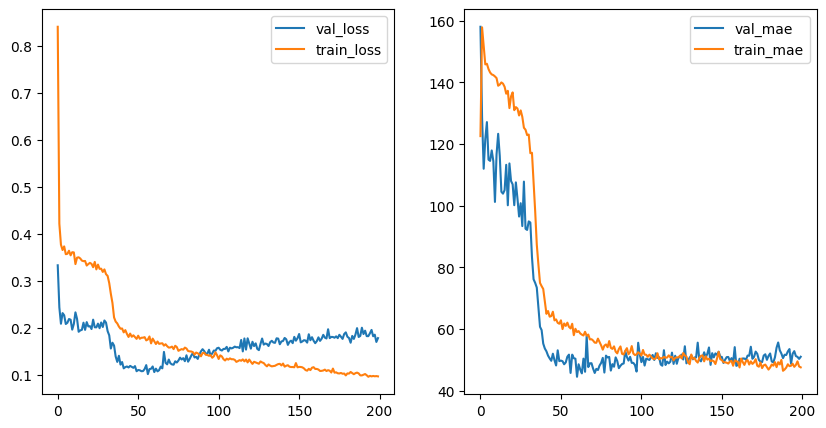

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['mape']
val_acc = history.history['val_mape']

eps = range(len(val_loss))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(eps, val_loss, label = 'val_loss')
ax1.plot(eps, loss, label = 'train_loss')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(eps, val_acc, label = 'val_mape')
ax2.plot(eps, acc, label = 'train_mape')
ax2.legend()
plt.show()

> - 약 50 에포크 부터 과적합이 일어나는것을 확인
> - 오차율은 약 40퍼센트로 조금더 전반적이 정확도가 높지는 않음
> - r2 스코어는 약 0.5정도로 전반적인 경향성을 따라가는 것을 확인

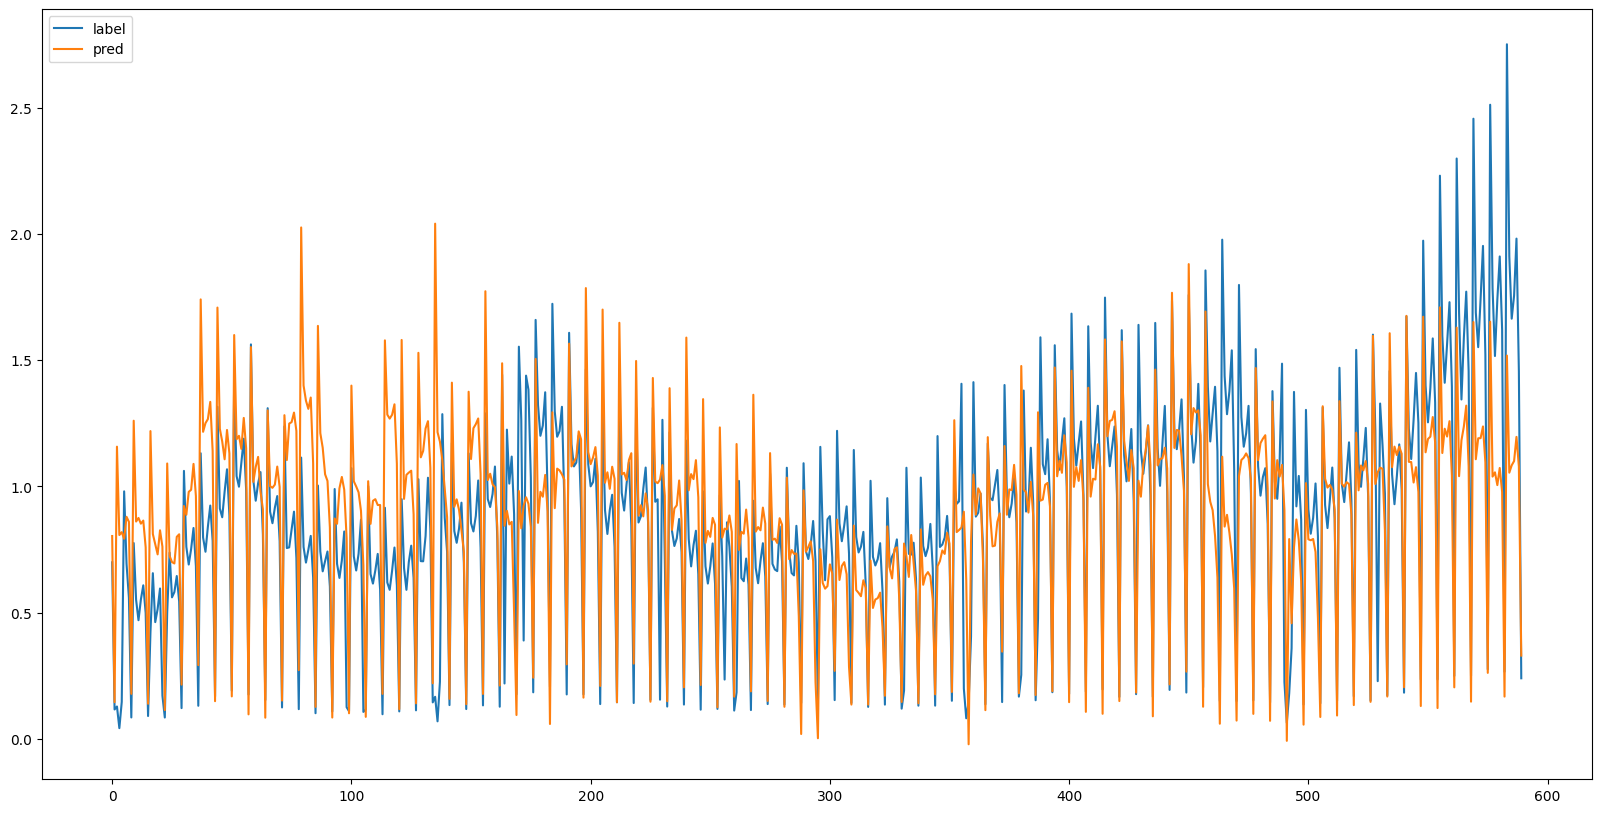

In [ ]:
model.load_weights(checkpoint_path)

plt.figure(figsize = (20,10))
prd = model(val_X)
plt.plot(range(val_X.shape[0]), val_Y, label = 'label')
plt.plot(range(val_X.shape[0]), prd, label = 'pred')
plt.legend()
plt.show()

> - 전반적인 경항성은 따라가지만 특정 구간에서 예측 값이 좀더 튀는 경우가 있음
> - 활용한 기후 및 일자 특성 데이터만으로 미래의 정확한 감기 발생건수를 예측하기에는 오차가 존재함을 확인
> - 등등 주관적인 해석...